# WHAT HAPPENED ON JUNE 1<sup>st</sup> ?: the power of speculation

<p>This notebook will analize a scraped airbnb dataset from Madrid county (Spain). It's downloaded from <a> http://insideairbnb.com/get-the-data.html </a> </p>

First of all, we import the libraries that we are going to need.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
from IPython.core.display import display, HTML

warnings.filterwarnings('ignore')
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline

## Importing data

From the csv downloaded from the former url, we load the data into memory.

In [2]:
airbnb = pd.read_csv("../input/sep_madrid_airbnb.csv")

## Understanding, tidying and transforming data

The former dataset has a lot of columns. More insights could be arisen from it, but for this EDA we'll select the most relevant ones.

In [3]:
#Select all relevant columns

df_airbnb = airbnb[['listing_url', 'name', 'host_id','calculated_host_listings_count_entire_homes', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',  'latitude', 'longitude', 'property_type', 'room_type', 'price', 'minimum_nights','number_of_reviews','availability_365', 'reviews_per_month']]

In [4]:
# We take a peek at the dataset

df_airbnb.head(3)

,listing_url,name,host_id,calculated_host_listings_count_entire_homes,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,price,minimum_nights,number_of_reviews,availability_365,reviews_per_month
0,https://www.airbnb.com/rooms/6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,0,Hispanoamérica,Chamartín,28016,40.45628,-3.67763,Apartment,Private room,$70.00,1,65,53,0.56
1,https://www.airbnb.com/rooms/21853,Bright and airy room,83531,0,Cármenes,Latina,28047,40.40341,-3.74084,Apartment,Private room,$17.00,4,33,48,0.55
2,https://www.airbnb.com/rooms/24805,Gran Via Studio Madrid,101471,1,Universidad,Centro,28004,40.42202,-3.70395,Apartment,Entire home/apt,$80.00,5,2,354,0.03


In [5]:
#Checking the amount of rows of the given dataset.

len(df_airbnb)

20837

In [6]:
#Checking dtypes

df_airbnb.dtypes

listing_url                                     object
name                                            object
host_id                                          int64
calculated_host_listings_count_entire_homes      int64
neighbourhood_cleansed                          object
neighbourhood_group_cleansed                    object
zipcode                                         object
latitude                                       float64
longitude                                      float64
property_type                                   object
room_type                                       object
price                                           object
minimum_nights                                   int64
number_of_reviews                                int64
availability_365                                 int64
reviews_per_month                              float64
dtype: object

From the dtypes, we see that ***price*** is of type object. This is because it's written with the currency symbol and separated with commas. Let's deal with it:

In [7]:
#remove $ sign , commas, and leading and trailing white spaces. After that, convert it to float

df_airbnb['price'] = df_airbnb['price'].str.replace('[$,]','').str.strip().astype(np.float64)


One thing we should always do, is counting the number of missing values.

In [8]:
df_airbnb.isnull().sum()

listing_url                                       0
name                                              5
host_id                                           0
calculated_host_listings_count_entire_homes       0
neighbourhood_cleansed                            0
neighbourhood_group_cleansed                      0
zipcode                                         466
latitude                                          0
longitude                                         0
property_type                                     0
room_type                                         0
price                                             0
minimum_nights                                    0
number_of_reviews                                 0
availability_365                                  0
reviews_per_month                              4654
dtype: int64

There are some NA values, some may be more relevant than others. We have:

<ul>
    <li>reviews_per_month: 4654 seems relevant, so we should analyze if we can infer this value.</li>    
    <li>zipcode: it represents 2% of the total: if we want to calculate some statistics over this one, we can fill this value with "other" for example</li>
    <li>name: this accommodation post just simply doesn't have a name </li>
    
</ul>



Let's check each NA in order to decide what to do with them

***Filling NA values for variable reviews_per_month***

In [9]:
df_airbnb.loc[df_airbnb.reviews_per_month.isnull()].head(5)

,listing_url,name,host_id,calculated_host_listings_count_entire_homes,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,price,minimum_nights,number_of_reviews,availability_365,reviews_per_month
28,https://www.airbnb.com/rooms/102040,Nice Single Room with wifi.,533936,0,Pueblo Nuevo,Ciudad Lineal,28017,40.43331,-3.64355,Apartment,Private room,20.0,3,0,47,NaN
59,https://www.airbnb.com/rooms/183435,CENTRAL REFURBISHED GENUINE XIXFLAT,877571,3,Justicia,Centro,28004,40.42396,-3.69545,Apartment,Entire home/apt,89.0,1,0,0,NaN
64,https://www.airbnb.com/rooms/200828,"FRENTE MAR, ZONA CALAS. PISCINA.",75944,1,Castellana,Salamanca,28006,40.43186,-3.68515,Apartment,Entire home/apt,140.0,7,0,119,NaN
79,https://www.airbnb.com/rooms/231861,COMFORTABLE ROOM IN A GREAT AREA!!!,1212528,0,Trafalgar,Chamberí,28010,40.43684,-3.70225,Apartment,Private room,30.0,1,0,88,NaN
194,https://www.airbnb.com/rooms/500742,"Near Retiro Park,Madrid 28007 Spain",2470700,1,Niño Jesús,Retiro,28007,40.41115,-3.67109,Apartment,Entire home/apt,110.0,4,0,48,NaN


From the former df we see that reviews_per_month is NaN when there aren't reviews at all in the accommodation post. So the logic step would be filling these values with 0.

In [10]:
df_airbnb.fillna(value = {'reviews_per_month': 0}, inplace = True)

***Filling NA values for variable Zipcode***

In [11]:
df_airbnb.fillna(value = {'zipcode': 'unknown'}, inplace = True)

----------------

## Exploring data

In our data exploration, we'll make our analysis from left to the right. This isn't a rule of thumb, but it's better to have a roadmap so we don't skip any insights. We'll skip name column at first, so our first one is host_id

In [12]:
#setting figure size for future visualizations

sns.set(rc={'figure.figsize':(10,8)})

***Top host***

A interesting analysis would be to check hown many accommodations top hosts have and explore some statistics grouped by hosts. 

In [13]:
top_host = df_airbnb.host_id.value_counts().head(10)

Text(0.5, 0, 'Accommodation count')

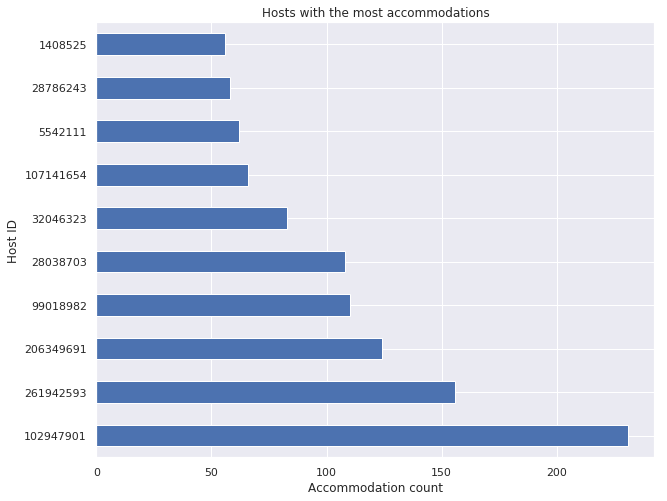

In [14]:
host_counts_plot = top_host.plot(kind='barh', title = 'Hosts with the most accommodations')
host_counts_plot.set_ylabel('Host ID')
host_counts_plot.set_xlabel('Accommodation count')

In [15]:
# We are going check some statistic about the distribution of acommodations per host id

df_airbnb.groupby('host_id').size().describe()

count    11969.000000
mean         1.740914
std          4.264970
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        231.000000
dtype: float64

From the former statistics we appreciate as expected that mosts of the hosts have only 1 accomodations on rental, although, as well soon see, there's is a standar distribution that is affected by the outliers

***Analysing statistcs grouped by neighbourhood***

In [16]:
# First of all, let's check the neighbourhoods in Madrid

df_airbnb[['neighbourhood_group_cleansed']].drop_duplicates().rename(columns = {'neighbourhood_group_cleansed': 'neighbourhood'})

,neighbourhood
0,Chamartín
1,Latina
2,Centro
4,Arganzuela
19,Salamanca
25,Tetuán
26,Fuencarral - El Pardo
28,Ciudad Lineal
29,Chamberí
42,Villaverde


In [17]:
# We'll use describe method to ouput all statistics grouped per neighbourhood

neighbour_stats = df_airbnb.groupby("neighbourhood_group_cleansed")["price"].describe().T
neighbour_stats

neighbourhood_group_cleansed,Arganzuela,Barajas,Carabanchel,Centro,Chamartín,Chamberí,Ciudad Lineal,Fuencarral - El Pardo,Hortaleza,Latina,Moncloa - Aravaca,Moratalaz,Puente de Vallecas,Retiro,Salamanca,San Blas - Canillejas,Tetuán,Usera,Vicálvaro,Villa de Vallecas,Villaverde
count,1121.000000,165.000000,678.000000,9773.000000,551.000000,1331.000000,613.000000,300.000000,332.000000,616.000000,542.000000,127.000000,591.000000,665.000000,1375.000000,524.000000,838.000000,361.000000,65.000000,103.000000,166.000000
mean,93.807315,132.430303,80.109145,129.875883,140.954628,124.414726,115.535073,138.526667,164.340361,125.724026,116.848708,98.165354,85.739425,116.487218,152.782545,390.849237,160.779236,190.216066,160.169231,114.407767,65.409639
std,322.616732,247.678938,185.498888,425.907877,341.624493,249.090018,252.111665,311.383872,317.905696,289.511916,219.936605,168.191962,274.032479,322.218889,394.465264,618.167561,407.350940,389.955749,237.511945,213.552144,134.401347
min,8.000000,16.000000,9.000000,10.000000,9.000000,9.000000,8.000000,10.000000,14.000000,9.000000,9.000000,12.000000,9.000000,9.000000,10.000000,12.000000,12.000000,10.000000,9.000000,9.000000,9.000000
25%,30.000000,30.000000,24.000000,50.000000,45.000000,36.500000,25.000000,28.000000,33.750000,23.000000,35.000000,23.000000,22.000000,38.000000,45.500000,40.000000,38.000000,25.000000,22.000000,23.000000,16.000000
50%,53.000000,47.000000,40.000000,75.000000,70.000000,60.000000,45.000000,50.000000,60.000000,40.000000,60.000000,35.000000,35.000000,65.000000,78.000000,120.000000,59.000000,36.000000,45.000000,48.000000,25.000000
75%,80.000000,95.000000,70.000000,105.000000,110.000000,100.000000,79.000000,95.000000,120.000000,69.250000,104.000000,80.000000,58.000000,110.000000,148.500000,500.000000,95.000000,65.000000,200.000000,89.500000,53.750000
max,8465.000000,1500.000000,3000.000000,9999.000000,5000.000000,5000.000000,3000.000000,3000.000000,3000.000000,1890.000000,2950.000000,1080.000000,4000.000000,6000.000000,8930.000000,6000.000000,8601.000000,1500.000000,1000.000000,1500.000000,1000.000000


The former table is difficult to analyse, so we will write a function to extract the top n metrics

In [18]:
def extract_top_n(series, n = 1):
    '''
    Return top n values inside a series
    '''
    series_sort = series.sort_values(ascending = False)
    return series_sort[0:n]

In [19]:
# Now we compute the two top n values from our stats table

neighbour_stats.apply(extract_top_n, axis = 1,  n = 2)

,Barajas,Centro,Hortaleza,Salamanca,San Blas - Canillejas,Usera,Vicálvaro
count,NaN,9773.000000,NaN,1375.0,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,390.849237,190.216066,NaN
std,NaN,425.907877,NaN,NaN,618.167561,NaN,NaN
min,16.0,NaN,14.0,NaN,NaN,NaN,NaN
25%,NaN,50.000000,NaN,45.5,NaN,NaN,NaN
50%,NaN,NaN,NaN,78.0,120.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,500.000000,NaN,200.0
max,NaN,9999.000000,NaN,8930.0,NaN,NaN,NaN


In order to complement our former table so we can extract more insights, we'll boxplot price grouped by neighbourhood.

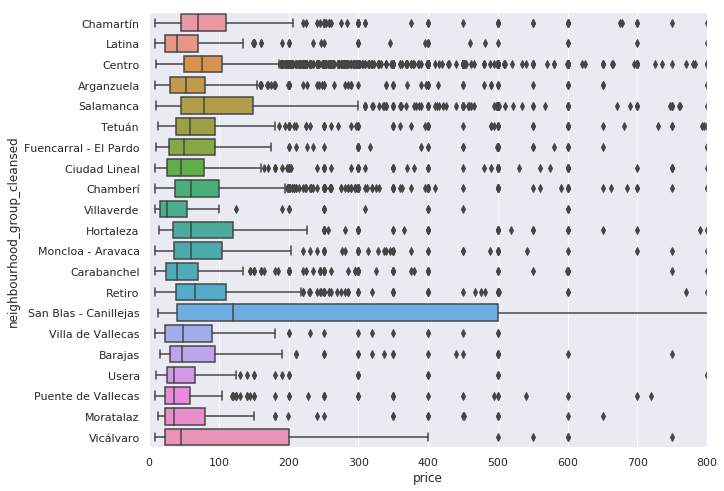

In [20]:
pic_1=sns.boxplot(data=df_airbnb, y='neighbourhood_group_cleansed', x='price')
ax = pic_1.axes.set_xlim(0,800)

<p> The former table and the boxplot gives ous some key information: </p>

<ul>
    <li>The two neighbourhoods with most accommodations are Centro (as expected) and Barrio de Salamanca. Barrio Salamanca is near the city centre and a quiet neighbourhood with many services and nice apartments, so it seems fair that people want to stay there for visiting. </li>   
    <li>There are plenty of outliers with high prices in Centro, Salamanca, Chamberí and Retiro. It seems that these are neighbourhoods with luxury rentals.</li>  
    <li>It seems that there is a high gap between 50 and 70 percentile in Vicálvaro and San Blas - Canillejas. This may be some <b> signal of speculation </b> responding to some event. We'll investigate deeper to find the cause. </li>  
    
</ul>


***Let's find why Vicálvaro and San Blas - Canillejas have this unusual distribution***

A good measure to find if there's been an event in a city is obtaining some metrics about the reviews. In the prospect of a huge event that brings tourism, people may take advantage of it to rent rooms or complete aparments at a higher price than in a normal situation. So it seems fair to suppose that accommodation with zero or one reviews will increase.

(0, 50000)

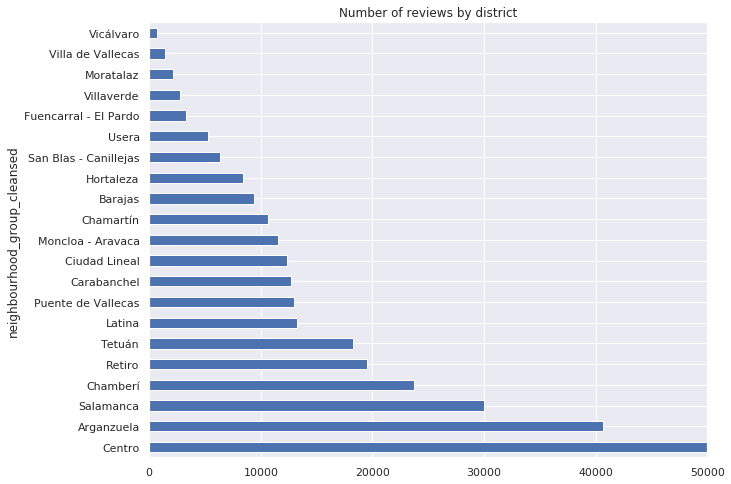

In [21]:
number_reviews_plot = df_airbnb.groupby('neighbourhood_group_cleansed')['number_of_reviews'].sum().sort_values(ascending = False).plot(kind = 'barh')
number_reviews_plot.set_title('Number of reviews by district')
number_reviews_plot.axes.set_xlim(0,50000)

Text(0.5, 1.0, 'Percentage of accommodations with 1 or 0 reviews')

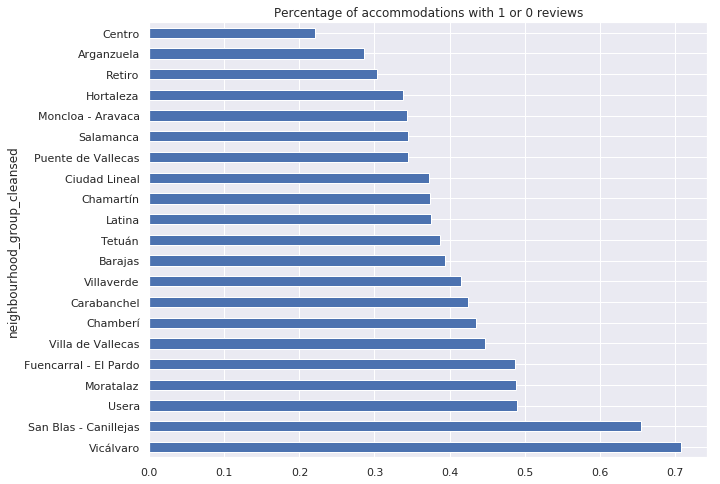

In [22]:
# Now let's compute accommodations with zero or one reviews

zero_reviews = df_airbnb.groupby('neighbourhood_group_cleansed')['number_of_reviews'].apply(lambda x: ((x <= 1).sum())/len(x)).sort_values(ascending = False).plot(kind = 'barh')
zero_reviews.set_title("Percentage of accommodations with 1 or 0 reviews")

**There it is!**. Our hypothesis about the reviews was right. Vicálvaro and San Blas - Canillejas increased a lot accommodations with zero or one reviews. So it seems that in the prospect of an event near this place, people took advantage to rent their accomodations.

Because we have the name attribute of our accommodation, we can check if there's information about the event. A good way would be counting words. 

In [23]:
#WFirst of all, we'll  filter out our two neighbourhoods: Vicálvaro and San Blas - Canillejas 

df_event = df_airbnb[df_airbnb.neighbourhood_group_cleansed.isin(['Vicálvaro', 'San Blas - Canillejas'])]

_names_ = []

# Looping the names in each accommodation

for name in df_event.name:
    _names_.append(name)
    
# Funtion for spliting words

def split_name(name):
    '''
    Return a list of words given a sentence
    '''
    splits = str(name).split()
    return splits

#Empty list for counting words.

_names_for_count_ = []

#getting name string from our list and using split function, later appending to list above

for x in _names_:
    for word in split_name(x):
        word = word.lower()
        _names_for_count_.append(word)

In [24]:
#For counting word, wells use Counter class from collections package

from collections import Counter

#let's see top 10 used words by host to name their listing

_top_w = Counter(_names_for_count_).most_common()
_top_10_w = _top_w[0:10]
_top_10_w

[('wanda', 201),
 ('champions', 121),
 ('habitación', 116),
 ('final', 107),
 ('metropolitano', 99),
 ('room', 83),
 ('league', 61),
 ('del', 56),
 ('en', 55),
 ('madrid', 53)]

## SO ON 1JUNE <sup>st</sup> , IT TOOK PLACE ON WANDA METROPOLITANO  CHAMPIONS LEAGUE  FINAL

![](https://i.imgur.com/8zMFtTW.png)

![](http://)

## GEOSPATIAL EDA

Because we have latitude and longitude, we can apply some geospatial EDA.

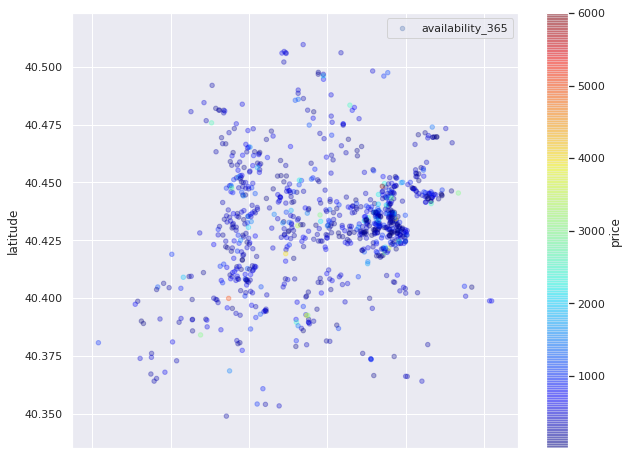

In [25]:
#Let's see what we can do with our given longitude and latitude columns

#We'll picture lat and long of the accommodations that contained words referencing the football match that took 
#place on June 1st


df_champions = df_airbnb.loc[df_airbnb.name.str.contains('junio |champion|wanda|estadio (?!Bernabeu)|(?<!Bernabeu) stadium|league|LIVERPOOL|TOTTENHAM|final|metropolitano', case=False, regex=True, na = False)]

pic_2=df_champions.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.3, figsize=(10,8))
pic_2.legend()

Now we'll use Folium library to visualize it on an interactive map. For people who don't know, Folium is a wrapper for leaflet library that allows us to plot points, geojson and topojson files, etc. on an interactive map.

In [26]:
import folium

In [27]:
m = folium.Map(
    location = [40.4168, -3.7038],
    tiles = 'Stamen Terrain',
    zoom_start = 12             
              )
df_champions.apply(lambda x: folium.Circle([x.latitude, x.longitude], 50, fill=True).add_to(m).add_to(m),axis = 1)
folium.Marker([40.4362, -3.5995], 'Wanda').add_to(m)

m

***Cleaning data***

In order to plot accommodation rentals on a normal situation, we'll erase from the dataset the neighbourhoods San Blas-Canillejas and Vicálvaro, as they are clearly affected by the event. Also, we'll delete accommodations with names referencing the event.

In [28]:
df_airbnb_clean = df_airbnb[~df_airbnb.neighbourhood_group_cleansed.isin(['San Blas - Canillejas', 'Vicálvaro'])]
df_airbnb_clean = df_airbnb_clean[~df_airbnb_clean.name.str.contains('junio |champion|wanda|estadio (?!Bernabeu)|(?<!Bernabeu) stadium|league|LIVERPOOL|TOTTENHAM|final|metropolitano', case=False, regex=True, na = False)]

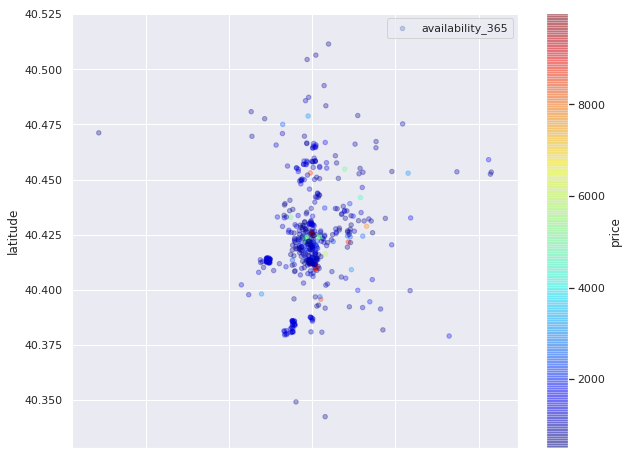

In [29]:
pic_3=df_airbnb_clean.loc[df_airbnb_clean.price > 500].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.3, figsize=(10,8))
pic_3.legend()

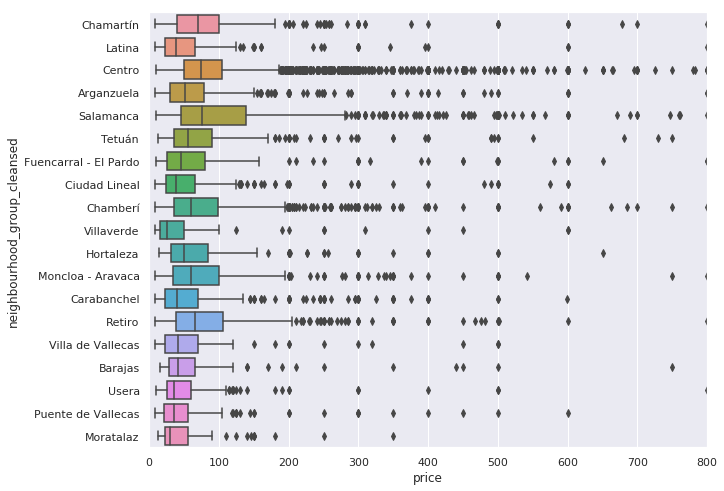

In [30]:
pic_4=sns.boxplot(data=df_airbnb_clean, y='neighbourhood_group_cleansed', x='price')
ax = pic_4.axes.set_xlim(0,800)

In [31]:
neighbour_stats = df_airbnb_clean.groupby("neighbourhood_group_cleansed")["price"].describe().T.apply(extract_top_n, axis = 1,  n = 2)
neighbour_stats 

,Barajas,Centro,Hortaleza,Retiro,Salamanca,Tetuán,Usera
count,NaN,9715.000000,NaN,NaN,1335.0,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,140.896595,181.830508
std,NaN,425.643001,NaN,NaN,NaN,398.656731,NaN
min,16.0,NaN,14.0,NaN,NaN,NaN,NaN
25%,NaN,50.000000,NaN,NaN,45.0,NaN,NaN
50%,NaN,74.000000,NaN,NaN,75.0,NaN,NaN
75%,NaN,NaN,NaN,106.0,139.0,NaN,NaN
max,NaN,9999.000000,NaN,NaN,8930.0,NaN,NaN


## CONCLUSION

<ol>
    <li>As a result of Champions League final in Wanda Metropolitano Stadium, accommodations prices were exaggeratedly up. Most of them on neighbourhoods near Wanda stadium like San Blas - Canillejas and Vicálvaro.</li>
    <li>Neihbourhoods with the highest number of accommodations are Centro and Barrio de Salamanca.</li>
    <li>Luxury aparments rentals are concentrated in Centro, Salamanca, Chamberí and Retiro. </li>        
    <li>Top ten hosts have over 50 apartments or rooms on rental.</li>       
</ol>

And so on... This data set can reveal more interesting insights. To be continued...